In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%load_ext autoreload
%reload_ext autoreload

import warnings; warnings.simplefilter('ignore')

#%ignore-warning
from sklearn import preprocessing

C:\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    

In [2]:
#Now join the various data set
#We are also replacing the NAN with 0
train = pd.read_csv('train.csv', parse_dates=['Date'])
train.columns = train.columns.str.lower()
features = pd.read_csv('features.csv', parse_dates=['Date'])
features.columns = features.columns.str.lower()
features[['markdown1', 'markdown2', 'markdown3','markdown4', 'markdown5']] = features[['markdown1', 'markdown2', 'markdown3','markdown4', 'markdown5']].fillna(0)
stores = pd.read_csv('stores.csv')
stores.columns = stores.columns.str.lower()
df_base = pd.merge(train,stores,on='store',how='left')
df_base = pd.merge(df_base,features,on=['store','date','isholiday'],how='left')

In [3]:
#See the type of each independent variable
#Need to encode : isholiday , type
#Get more features from date and then remove the date
#Step 1:Look at the data type
df_base.dtypes
df_base.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [4]:
#Step 2:Check for missing value
#Look for the missing values
#We have no missing values 
#Create a function for the same
def check_miss_val(df):
    print(df.isnull().sum())
check_miss_val(df_base)

store           0
dept            0
date            0
weekly_sales    0
isholiday       0
type            0
size            0
temperature     0
fuel_price      0
markdown1       0
markdown2       0
markdown3       0
markdown4       0
markdown5       0
cpi             0
unemployment    0
dtype: int64


In [5]:
#For providing additional info on the data
#This will generatet the report of all the variables
pandas_profiling.ProfileReport(df_base)

Number of variables,16
Number of observations,421570
Total Missing (%),0.0%
Total size in memory,51.9 MiB
Average record size in memory,129.0 B
Numeric,13
Categorical,1
Boolean,1
Date,1
Text (Unique),0
Rejected,0


In [6]:
#Step 3:Pre-processing - Removing irrelevant columne
#Looking at the report 
#We can drop all the markdown column
df_base.drop(columns=['markdown1','markdown2','markdown3','markdown4','markdown5'],axis=1,inplace=True)

In [7]:
#Step 3:Pre-processing - Encode categorical variable
#Now encode the categorical variable

cleanup = {'A':1 , 'B':2 , 'C':3}
df_base['type'] = df_base['type'].replace(cleanup,regex=True)


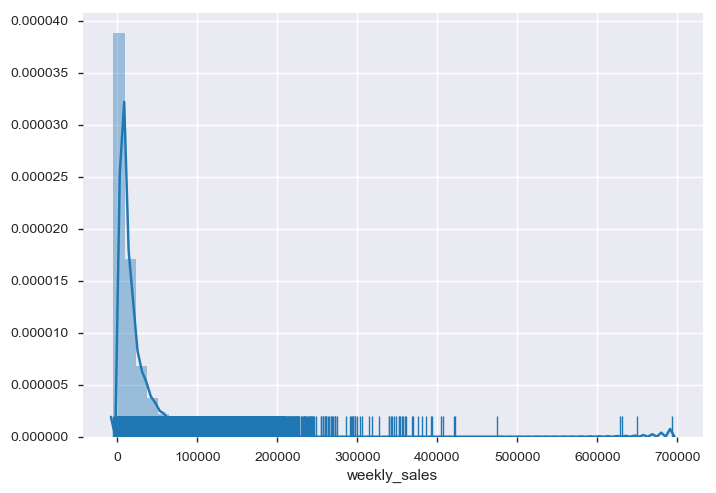

In [8]:
#Exploratory Data Analysis
#Target column
#It clear from the plot the data is +ve skewed
e1 = sns.distplot(df_base['weekly_sales'],rug=True,kde=True)

In [9]:
#Feature engineering from date
column_1 = df_base['date']

temp = pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              #"hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              #"dayofweek": column_1.dt.dayofweek,
              #"weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

df_base.reset_index(drop=True, inplace=True)
temp.reset_index(drop=True, inplace=True)
df_base = pd.concat([df_base,temp],axis=1)

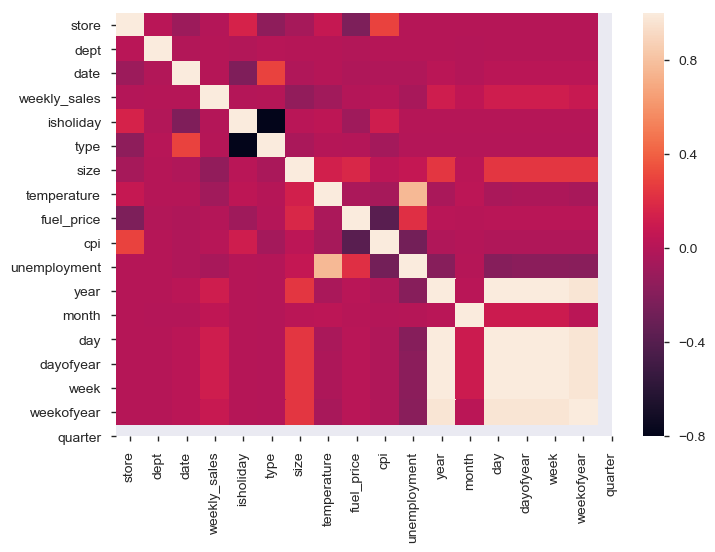

In [10]:
#Correlation graph 
#kendall
#pearson
corr = df_base.corr(method='spearman')
sns.heatmap(corr, 
        xticklabels=df_base.columns,
        yticklabels=df_base.columns)

In [11]:
#Linear regression 
Feature_matrix = df_base.copy(deep=True)
Feature_matrix.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,cpi,unemployment,year,month,day,dayofyear,week,weekofyear,quarter
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,36,5,5,1
1,1,1,2010-02-12,46039.49,True,1,151315,38.51,2.548,211.242170,8.106,2010,2,12,43,6,6,1
2,1,1,2010-02-19,41595.55,False,1,151315,39.93,2.514,211.289143,8.106,2010,2,19,50,7,7,1
3,1,1,2010-02-26,19403.54,False,1,151315,46.63,2.561,211.319643,8.106,2010,2,26,57,8,8,1
4,1,1,2010-03-05,21827.90,False,1,151315,46.50,2.625,211.350143,8.106,2010,3,5,64,9,9,1


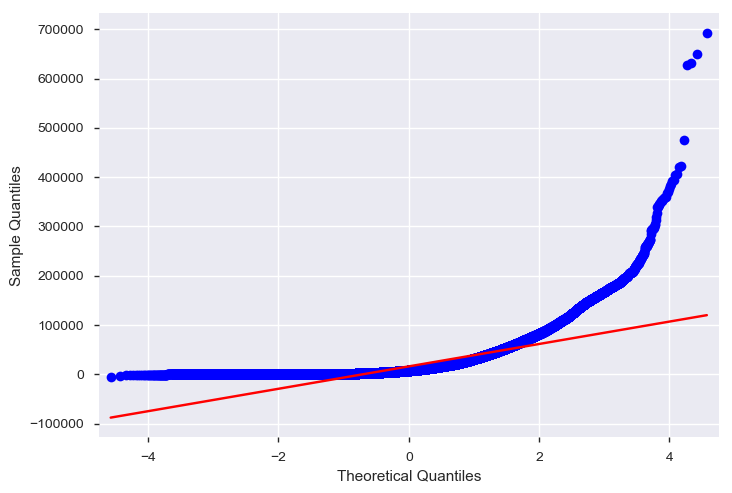

In [12]:
#Pre-process for the residual plot
#Looking at plot itself 
#This is normal distribution 
#We have to use non parametrice Test
from statsmodels.graphics.gofplots import qqplot
qqplot(df_base['weekly_sales'], line='s')
plt.show()

In [13]:
target = Feature_matrix['weekly_sales']
Feature_matrix.drop(columns=['date','weekly_sales'],axis=1,inplace=True)
Feature_matrix.head()

,store,dept,isholiday,type,size,temperature,fuel_price,cpi,unemployment,year,month,day,dayofyear,week,weekofyear,quarter
0,1,1,False,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,36,5,5,1
1,1,1,True,1,151315,38.51,2.548,211.242170,8.106,2010,2,12,43,6,6,1
2,1,1,False,1,151315,39.93,2.514,211.289143,8.106,2010,2,19,50,7,7,1
3,1,1,False,1,151315,46.63,2.561,211.319643,8.106,2010,2,26,57,8,8,1
4,1,1,False,1,151315,46.50,2.625,211.350143,8.106,2010,3,5,64,9,9,1


In [14]:
#e2 = sns.lineplot(x=df_base['date'],y=df_base['weekly_sales'],data=df_base,hue='isholiday')
df_base['isholiday'].unique()

#Feature_matrix.drop(columns=['isholiday'],axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_base["isholiday"] = lb_make.fit_transform(df_base["isholiday"])
Feature_matrix.head()

,store,dept,isholiday,type,size,temperature,fuel_price,cpi,unemployment,year,month,day,dayofyear,week,weekofyear,quarter
0,1,1,False,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,36,5,5,1
1,1,1,True,1,151315,38.51,2.548,211.242170,8.106,2010,2,12,43,6,6,1
2,1,1,False,1,151315,39.93,2.514,211.289143,8.106,2010,2,19,50,7,7,1
3,1,1,False,1,151315,46.63,2.561,211.319643,8.106,2010,2,26,57,8,8,1
4,1,1,False,1,151315,46.50,2.625,211.350143,8.106,2010,3,5,64,9,9,1


In [15]:
#regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import math
X_train , X_test , y_train,y_test = train_test_split(Feature_matrix,target,test_size=0.2,random_state=29)


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
#Regression : 1.Linear Regression
#Looking at the score is pretty bad
#regr = linear_model.LinearRegression()
#regr.fit(X_train,y_train)
#regr.score(X_test,y_teat)
# Calculate the Root Mean Squared Error
#print("RMSE: %.2f"% math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

In [17]:
#Regression :2.XGboost regression
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
#xgb.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:26014.4
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:24315.8
[2]	validation_0-rmse:22819.1
[3]	validation_0-rmse:21405.1
[4]	validation_0-rmse:20123.4
[5]	validation_0-rmse:18977.7
[6]	validation_0-rmse:17949.7
[7]	validation_0-rmse:17013.7
[8]	validation_0-rmse:16186.4
[9]	validation_0-rmse:15425.9
[10]	validation_0-rmse:14767.8
[11]	validation_0-rmse:14126.9
[12]	validation_0-rmse:13557.9
[13]	validation_0-rmse:13087.2
[14]	validation_0-rmse:12591
[15]	validation_0-rmse:12169.1
[16]	validation_0-rmse:11801.4
[17]	validation_0-rmse:11455.8
[18]	validation_0-rmse:11180.5
[19]	validation_0-rmse:10915.1
[20]	validation_0-rmse:10621.5
[21]	validation_0-rmse:10370.3
[22]	validation_0-rmse:10146.8
[23]	validation_0-rmse:9964.67
[24]	validation_0-rmse:9771.02
[25]	validation_0-rmse:9618.98
[26]	validation_0-rmse:9474.52
[27]	validation_0-rmse:9329.12
[28]	validation_0-rmse:9206.92
[29]	validation_0-rmse:9103.69
[30]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [18]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.9140990549749957


In [19]:
#e1 = sns.lineplot(x=df_base['date'],y=y_train,data=df_base)
len(y_train)

337256

84314


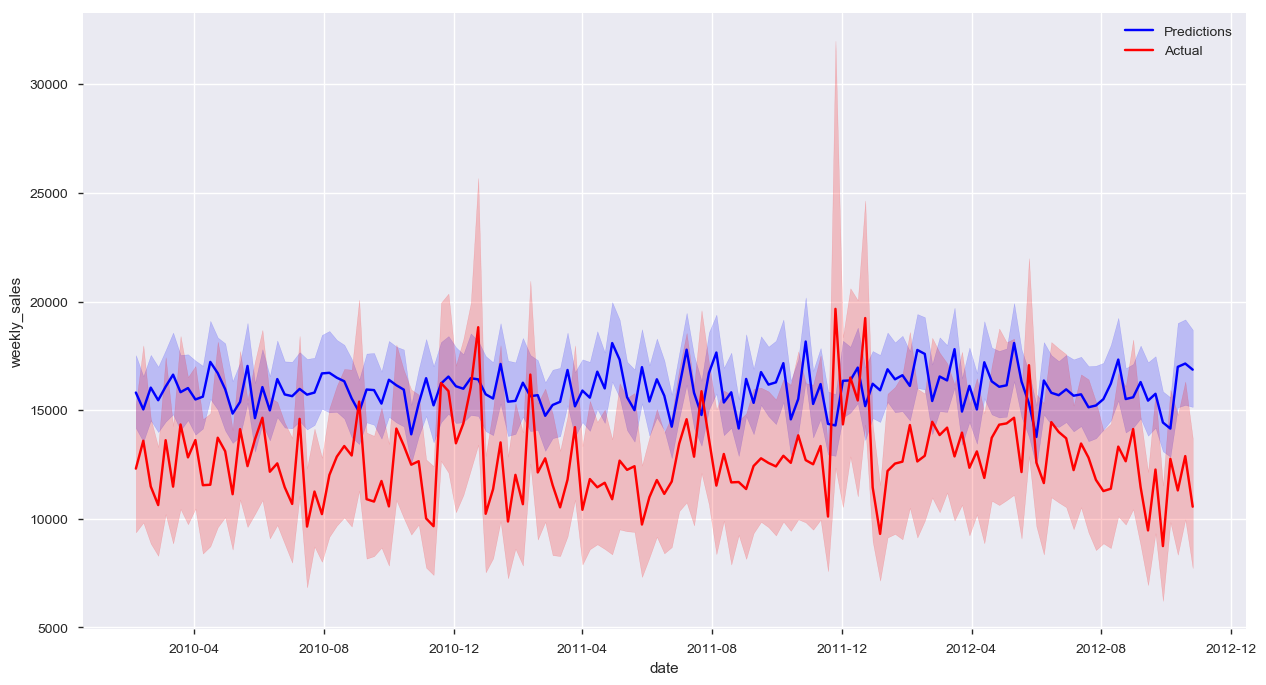

In [20]:
test_date = df_base[len(X_train):]
print(len(test_date))
plt.figure(figsize=(15,8))
e1 = sns.lineplot(x = test_date['date'],y=predictions,data=test_date,color='blue',label='Predictions')
e2 = sns.lineplot(x = test_date['date'],y=y_test,data=test_date,color='red',label='Actual')

#plt.figure(figsize=(15,8))
#e2 = sns.lineplot(x=df_base['date'],y=predictions,data=df_base,markers=True)

In [21]:
#For showing the predicted result
test_date.sort_values(by='date',inplace=True)
df_base.sort_values(by='date',inplace=True)
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as py
actual_chart = go.Scatter(x=test_date['date'] , y=y_test, name= 'Actual')
predict_chart = go.Scatter(x=test_date['date'],y=predictions, name= 'Predicted')
py.plot([actual_chart,predict_chart])

'file://C:\\Users\\Shashi.Raj\\Downloads\\walmart-recruiting-store-sales-forecasting\\temp-plot.html'

In [22]:
#Parameter Tunning for XGboost
from xgboost.sklearn import XGBRegressor  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor(nthreads=-1)  

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=-1)  
gs.fit(X_train, y_train,verbose=True)  
#gs.best_model_  

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021735957780>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000217359575F8>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000217359577B8>, 'cols...60>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021735957160>},
          pre_dispatch='2*n_jobs', random_state=None, refit=T

In [23]:
predictions = gs.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.9838682664204733


84314


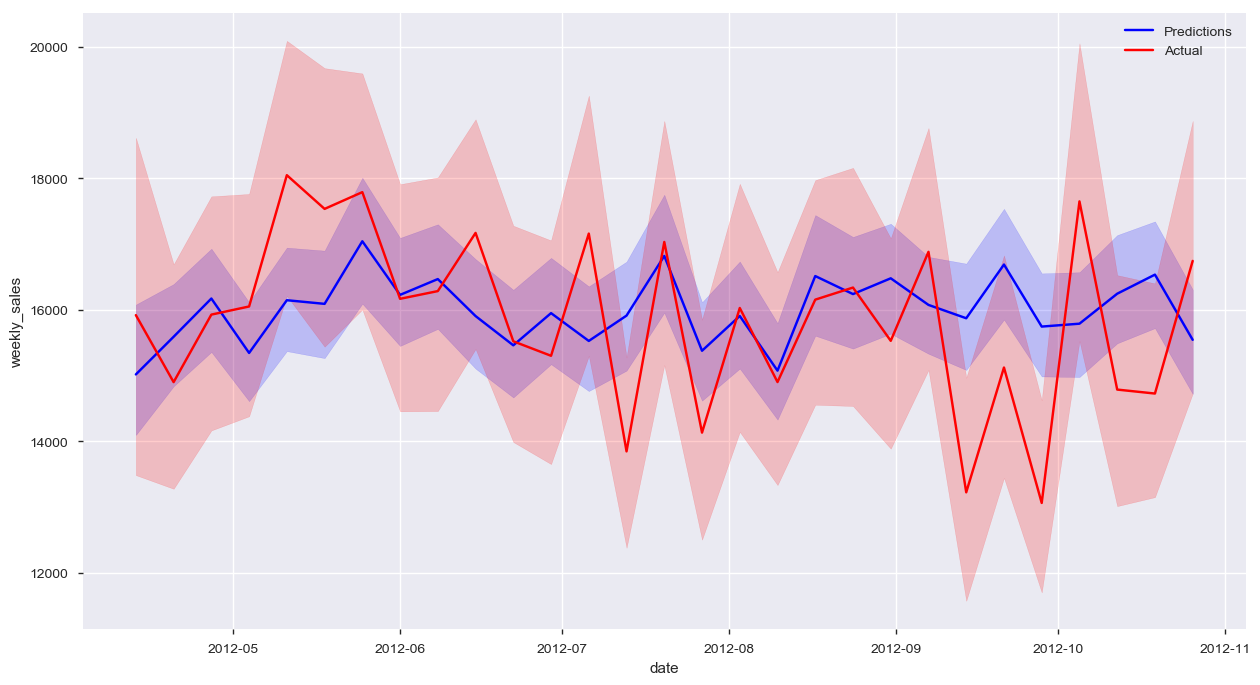

In [24]:
test_date = df_base[len(X_train):]
print(len(test_date))
plt.figure(figsize=(15,8))
e1 = sns.lineplot(x = test_date['date'],y=predictions,data=test_date,color='blue',label='Predictions')
e2 = sns.lineplot(x = test_date['date'],y=y_test,data=test_date,color='red',label='Actual')

In [25]:
# feature importance
gs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8210318804836004, gamma=4.148519456517409,
       learning_rate=0.3413686137780186, max_delta_step=0, max_depth=35,
       min_child_weight=10.575406688276084, missing=None, n_estimators=26,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
       random_state=0, reg_alpha=16.565136475788236, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9499434382156007)

In [29]:

xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8210318804836004, gamma=4.148519456517409,
       learning_rate=0.3413686137780186, max_delta_step=0, max_depth=35,
       min_child_weight=10.575406688276084, missing=None, n_estimators=26,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
       random_state=0, reg_alpha=16.565136475788236, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9499434382156007)
#xgb.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:24628.5
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:16659.5
[2]	validation_0-rmse:11519.2
[3]	validation_0-rmse:8229.18
[4]	validation_0-rmse:7795.36
[5]	validation_0-rmse:5867.78
[6]	validation_0-rmse:4684
[7]	validation_0-rmse:3997.03
[8]	validation_0-rmse:3571.64
[9]	validation_0-rmse:3338.41
[10]	validation_0-rmse:3224.31
[11]	validation_0-rmse:3160.18
[12]	validation_0-rmse:3112.17
[13]	validation_0-rmse:3073.39
[14]	validation_0-rmse:3011.56
[15]	validation_0-rmse:2999.95
[16]	validation_0-rmse:2973.26
[17]	validation_0-rmse:2928.77
[18]	validation_0-rmse:2894.18
[19]	validation_0-rmse:2904.36
[20]	validation_0-rmse:2910.21
[21]	validation_0-rmse:2897.98
[22]	validation_0-rmse:2899.58
[23]	validation_0-rmse:2883.69
[24]	validation_0-rmse:2882.68
[25]	validation_0-rmse:2867.01


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8210318804836004, gamma=4.148519456517409,
       learning_rate=0.3413686137780186, max_delta_step=0, max_depth=35,
       min_child_weight=10.575406688276084, missing=None, n_estimators=26,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
       random_state=0, reg_alpha=16.565136475788236, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9499434382156007)

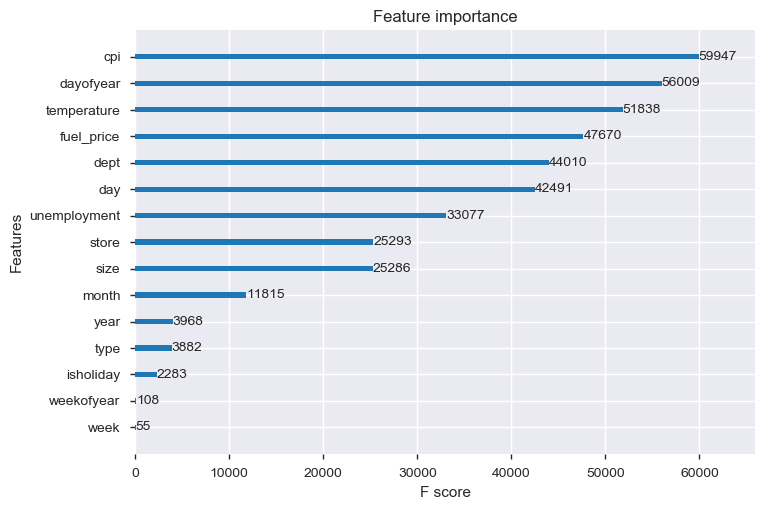

In [30]:
from matplotlib import pyplot
from xgboost import plot_importance
# feature importance
#print(xgb.feature_importances_)
# plot
#pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
#pyplot.show()
plot_importance(xgb)
pyplot.show()

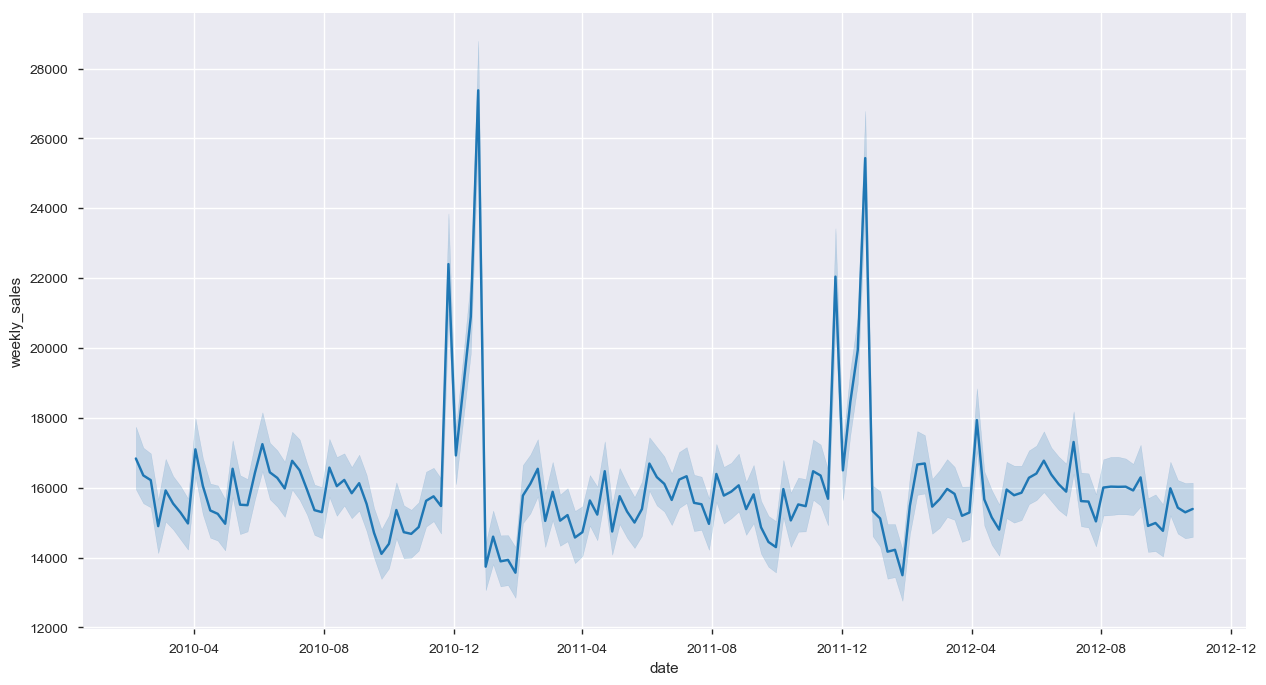

In [31]:
#show the data 
plt.figure(figsize=(15,8))
e1 = sns.lineplot(x=df_base['date'],y=df_base['weekly_sales'],data=df_base)

In [32]:
df_base.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,cpi,unemployment,year,month,day,dayofyear,week,weekofyear,quarter
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,36,5,5,1
277665,29,5,2010-02-05,15552.08,0,2,93638,24.36,2.788,131.527903,10.064,2010,2,5,36,5,5,1
277808,29,6,2010-02-05,3200.22,0,2,93638,24.36,2.788,131.527903,10.064,2010,2,5,36,5,5,1
277951,29,7,2010-02-05,10820.05,0,2,93638,24.36,2.788,131.527903,10.064,2010,2,5,36,5,5,1
278094,29,8,2010-02-05,20055.64,0,2,93638,24.36,2.788,131.527903,10.064,2010,2,5,36,5,5,1
